<a href="https://colab.research.google.com/github/JennEYoon/ECG-transform/blob/main/notebooks/load_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading .mat data files, MATLAB format in Python  
Jennifer Yoon  
Feb 4, 2025 Tuesday 7:30pm start   

Manually upload a small fraction of data files from "g1" folder, from CinC 2020 Challenge  
***PTB XL dataset***.  

Total 21,837 files (HR00,001 .. HR21,837)  
folders g1 .. g22  
about 1,000 files per folder  
data in .mat, header info in .hea  
Each file has 12-leads (rows?) in same order (I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5, V6)  

In [ ]:
!pwd

/content


In [ ]:
!ls -h

HR00001.hea  HR00002.mat  HR00004.hea  HR00005.mat  HR00007.hea  HR00008.mat  HR00010.hea
HR00001.mat  HR00003.hea  HR00004.mat  HR00006.hea  HR00007.mat  HR00009.hea  HR00010.mat
HR00002.hea  HR00003.mat  HR00005.hea  HR00006.mat  HR00008.hea  HR00009.mat  sample_data


In [ ]:
import scipy.io
import numpy as np

print(scipy.__version__)
print(np.__version__)

1.13.1
1.26.4


### Session with ChatGPT o1-mini:  
MATLAB .mat files often contain structure arrays, which are stored as ***numpy.ndarray*** objects containing **scipy.io.matlab**.mio5_params.mat_struct objects. To properly access them in Python, you need to convert them into dictionaries for easier manipulation.

#### Example: Loading and Accessing a Struct Array  
```python
import scipy.io
import numpy as np

# Load the .mat file
mat_data = scipy.io.loadmat('filename.mat', struct_as_record=False, squeeze_me=True)

# Check the keys in the loaded data
print(mat_data.keys())

# Access the struct (assuming the variable is named 'myStruct')
my_struct = mat_data['myStruct']

# Check fields in the struct
print(dir(my_struct))  # Shows the attributes of the struct

# Access a specific field (e.g., 'field1')
print(my_struct.field1)
```
Explanation:  
 * squeeze_me=True removes unnecessary nesting (like single-element arrays).  
 * struct_as_record=False ensures MATLAB structs are loaded as objects.  
 * The mat_struct_to_dict function recursively converts struct arrays into Python dictionaries for easy access.  

In [ ]:
filename = "HR00001.mat"

# Load the .mat file
mat_data = scipy.io.loadmat(filename, struct_as_record=False, squeeze_me=True)
print(mat_data, type(mat_data))

# Check the keys in the loaded data
print(mat_data.keys())  # only one key, 'val'.

# Access the struct (assuming the variable is named 'myStruct')
data = mat_data['val']

# Show elements of data (ndarray type)
print('first 5 elements: \n', data[:5])
print('length of row 0:', len(data[0]))

{'val': array([[-115, -115, -115, ...,  210,  210,  210],
       [ -50,  -50,  -50, ...,  205,  205,  205],
       [  65,   65,   65, ...,   -5,   -5,   -5],
       ...,
       [ -35,  -35,  -35, ...,  185,  185,  185],
       [ -35,  -35,  -35, ...,  170,  170,  170],
       [ -75,  -75,  -75, ...,  180,  180,  180]], dtype=int16)} <class 'dict'>
dict_keys(['val'])
first 5 elements: 
 [[-115 -115 -115 ...  210  210  210]
 [ -50  -50  -50 ...  205  205  205]
 [  65   65   65 ...   -5   -5   -5]
 [  82   82   82 ... -207 -207 -207]
 [ -90  -90  -90 ...  107  107  107]]
length of row 0: 5000


In [ ]:
data.shape, type(data)

((12, 5000), numpy.ndarray)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)

3.10.0


### ChatGPT o1-mini session:  
```python
import numpy as np
import matplotlib.pyplot as plt

# Simulated data: 12 rows, 5000 columns
data = np.random.randn(12, 5000)  # Replace with your actual data

# Downsample by taking every 4th sample (since 125 Hz is 1/4 of 500 Hz)
downsampled_data = data[:, ::4]  # Now shape (12, 1250)

# Time axis (assuming 500 Hz for 5000 samples, now adjusted for 125 Hz)
time_original = np.arange(5000) / 500  # Original time axis (seconds)
time_downsampled = np.arange(1250) / 125  # Downsampled time axis

# Plot all 12 signals
plt.figure(figsize=(12, 8))

for i in range(12):
    plt.plot(time_downsampled, downsampled_data[i] + i * 5, label=f"Signal {i+1}")  
    # Offset each signal for clarity

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Downsampled Signals (125 Hz)")
plt.legend()
plt.show()
```

In [ ]:
# data defined above, ndarray shape (12, 5000), sampled at 500 hertz, 12 rows are ECG leads

# Downsample by taking every 4th sample (since 125 Hz is 1/4 of 500 Hz)
downsampled_data = data[:, ::4]  # Now shape (12, 1250)
print(downsampled_data.shape)

(12, 1250)


In [ ]:
# Time axis (assuming 500 Hz for 5000 samples, now adjusted for 125 Hz)
# time_original = np.arange(5000) / 500  # Original time axis (seconds)
time_downsampled = np.arange(1250) / 125  # Downsampled time axis
# print([f"{x:.3f}" for x in time_downsampled])

In [ ]:
ecg_labels = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
type(ecg_labels), len(ecg_labels)

(list, 12)

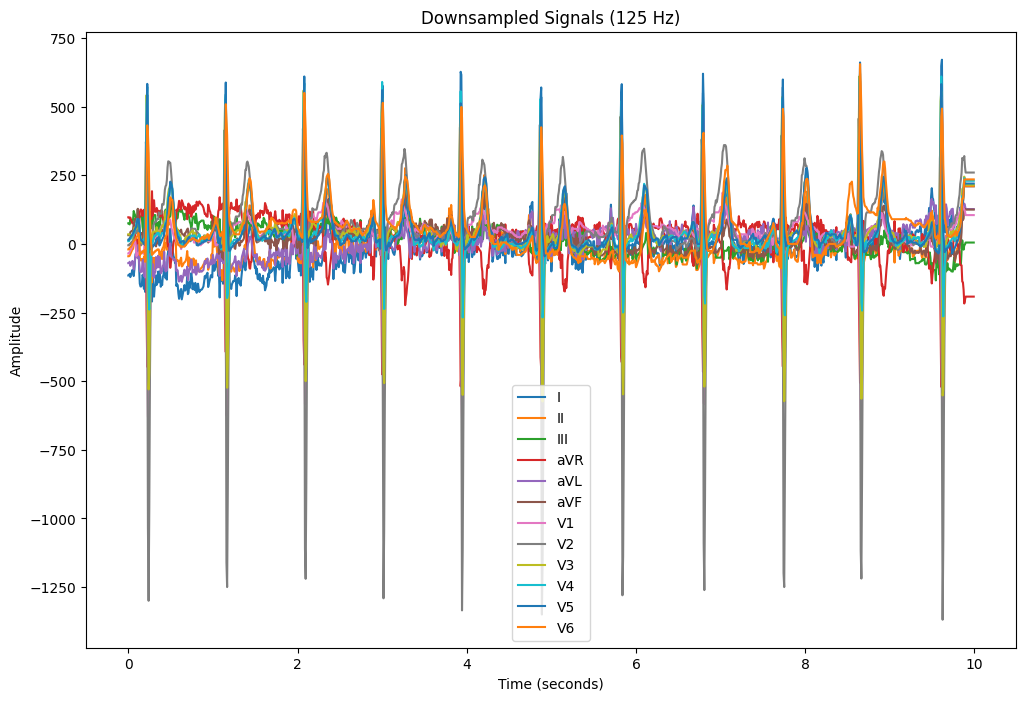

In [ ]:
# Plot all 12 signals
plt.figure(figsize=(12, 8))

for i in range(12):
    plt.plot(time_downsampled, downsampled_data[i] + i * 5, label=ecg_labels[i])
    # Offset each signal for clarity

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Downsampled Signals (125 Hz)")
plt.legend()
plt.show()

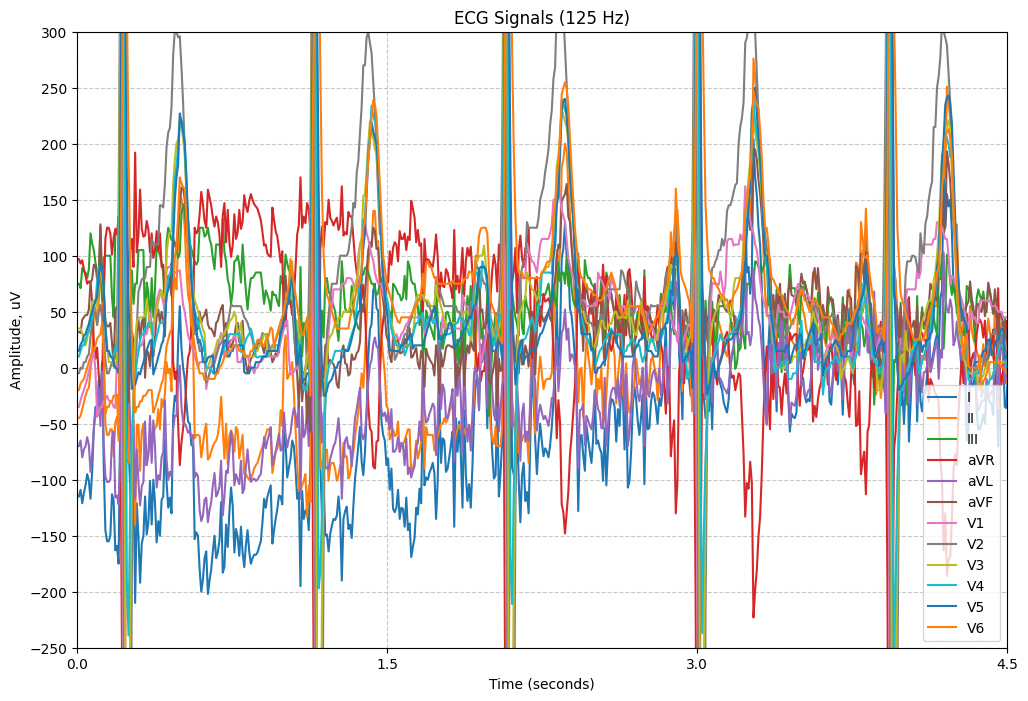

In [ ]:
# Modified plot, smaller area. Formatting with ChatGPT help here.

# Plot all 12 signals
fig = plt.figure(1, figsize=(12, 8))
ecg_labels = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

for i in range(12):
    plt.plot(time_downsampled, downsampled_data[i] + i * 5, label=ecg_labels[i])
    # Offset each signal for clarity

# Set x-axis limits to show the first 4.5 seconds
plt.xlim(0, 4.5)
# Set y-axis limits from -250 to 300
plt.ylim(-250, 300)

# Set x-axis ticks and grid every 1.5 seconds
plt.xticks(ticks=[0, 1.5, 3.0, 4.5])
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid on x-axis every 1.5 sec

# Set y-axis ticks every 50 units, auto adjust y-grids.
plt.yticks(range(-250, 301, 50))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude, uV")
plt.title("ECG Signals (125 Hz)")
plt.legend()

# save image
plt.savefig("ecg12lead_4.5sec.png", dpi=200, bbox_inches='tight')

plt.show()


<Figure size 640x480 with 0 Axes>

### ChatGPT help with "1" in figure ID.   

```python
fig = plt.figure(1, figsize=(12, 8))
```

the `1` is the **figure number (figure ID)**. Here's what it does:

### **Role of `1`:**
- If a figure with the given ID (`1`) already exists, `plt.figure(1)` makes it the **current active figure**.
- If no such figure exists, it **creates a new figure** with that ID.

### **How It Works:**
1. If `plt.figure(1)` is called and Figure 1 already exists, it **switches to that figure** instead of creating a new one.
2. If no figure with ID `1` exists, a new figure is **created and assigned the ID 1**.
3. The `figsize=(12, 8)` argument specifies the figure size in inches.

### **Example Usage:**
```python
import matplotlib.pyplot as plt

# Create Figure 1
fig1 = plt.figure(1, figsize=(12, 8))
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Figure 1")

# Create Figure 2
fig2 = plt.figure(2, figsize=(8, 6))
plt.plot([1, 2, 3], [6, 5, 4])
plt.title("Figure 2")

# Switch back to Figure 1 and modify it
plt.figure(1)
plt.xlabel("X-Axis")

plt.show()
```

### **Key Points:**
- Calling `plt.figure(1)` again **reactivates** Figure 1 instead of making a new one.
- This is useful when managing multiple figures in the same script.
- If you don't specify a number, `plt.figure()` creates a new figure with an **automatically assigned** number.


```

### JY Comment:  
Clear correlation among leads. Plot still too busy. Try plotting few leads at a time. Save plots to .png files

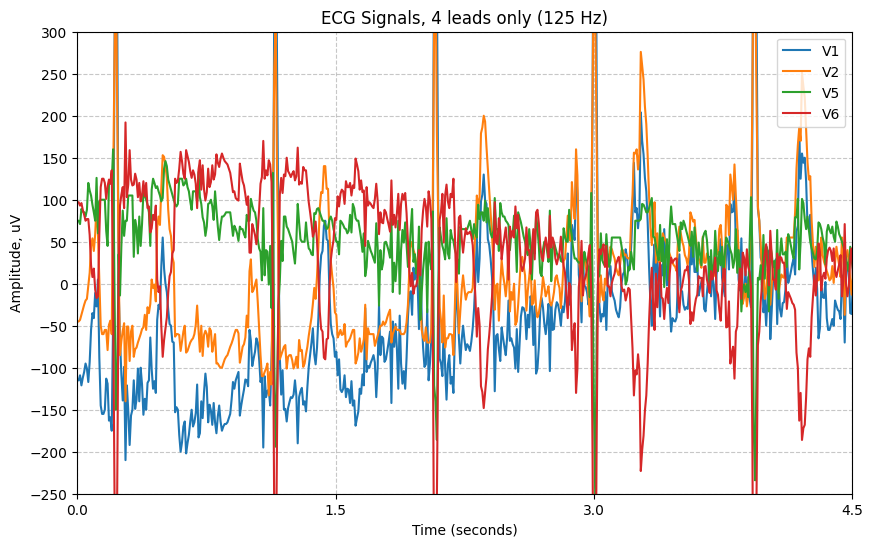

In [ ]:
# Smaller plot, few leads at a time.

# Plot all 4 signals
fig = plt.figure(2, figsize=(10, 6))
ecg_labels = ['V1', 'V2', 'V5', 'V6']
#V1 and V2 are nearest heart front, V5 and V6 are side of chest.

for i in range(4):
    plt.plot(time_downsampled, downsampled_data[i] + i * 5, label=ecg_labels[i])
    # Offset each signal for clarity

# Set x-axis limits to show the first 4.5 seconds
plt.xlim(0, 4.5)
# Set y-axis limits from -250 to 300
plt.ylim(-250, 300)

# Set x-axis ticks and grid every 1.5 seconds
plt.xticks(ticks=[0, 1.5, 3.0, 4.5])
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid on x-axis every 1.5 sec

# Set y-axis ticks every 50 units, auto adjust y-grids.
plt.yticks(range(-250, 301, 50))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude, uV")
plt.title("ECG Signals, 4 leads only (125 Hz)")
plt.legend()

# save image
plt.savefig("ecg_4lead_4.5sec.png", dpi=200, bbox_inches='tight')

plt.show()

#### JY Comment:   
Signal looks jagged. Should I be smoothing instead of sampling every 4th item? Maybe take an average of 4 signals?  Try later.  

Next try a different file.  All of this was with HR00,001.mat file.  
Read in 10th .mat file.  

### 2. Read in 2nd file HR00010.mat  
Timestamp: 10:30 pm  
Jennifer Yoon continue work  

In [ ]:
# Load the .mat file
filename = "HR00010.mat"
mat_data = scipy.io.loadmat(filename, struct_as_record=False, squeeze_me=True)
data = mat_data['val']
print(data.shape)

(12, 5000)


In [ ]:
# Downsample by taking every 4th sample (since 125 Hz is 1/4 of 500 Hz)
downsampled_data = data[:, ::4]  # Now shape (12, 1250)
time_downsampled = np.arange(1250) / 125  # Downsampled time axis

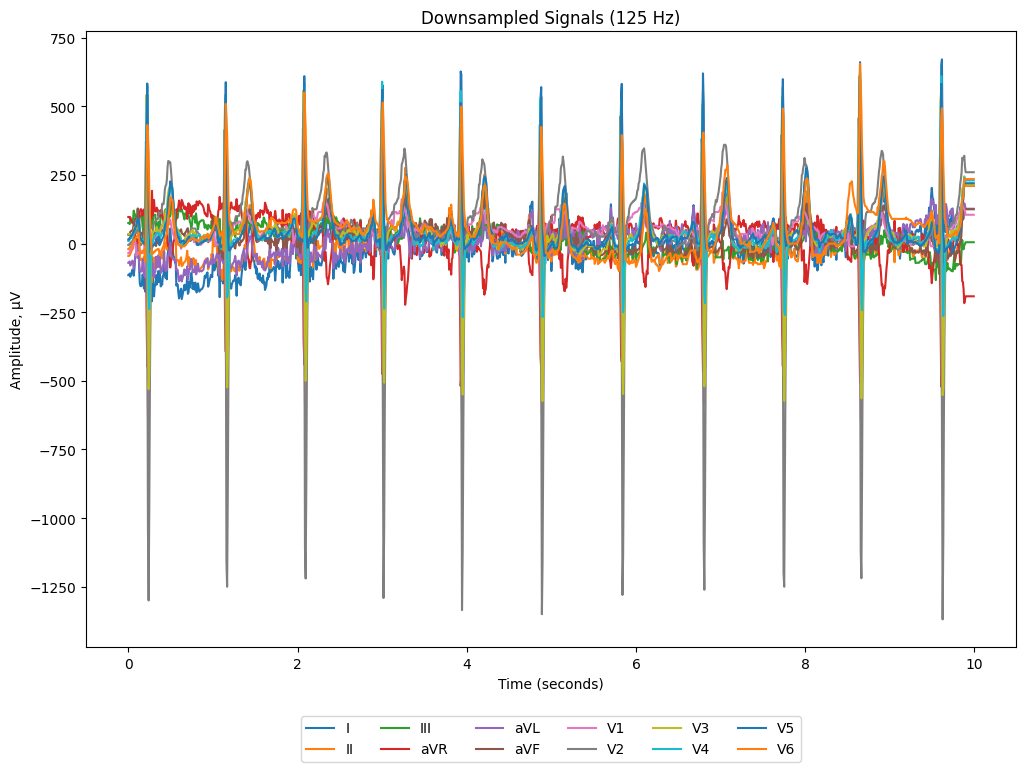

In [ ]:
# Plot all 12 signals
fig = plt.figure(3, figsize=(12, 8))
ecg_labels = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

for i in range(12):
    plt.plot(time_downsampled, downsampled_data[i] + i * 5, label=ecg_labels[i])
    # Offset each signal for clarity

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude, \u03BCV") #Corrected this line
plt.title("Downsampled Signals (125 Hz)")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=6)


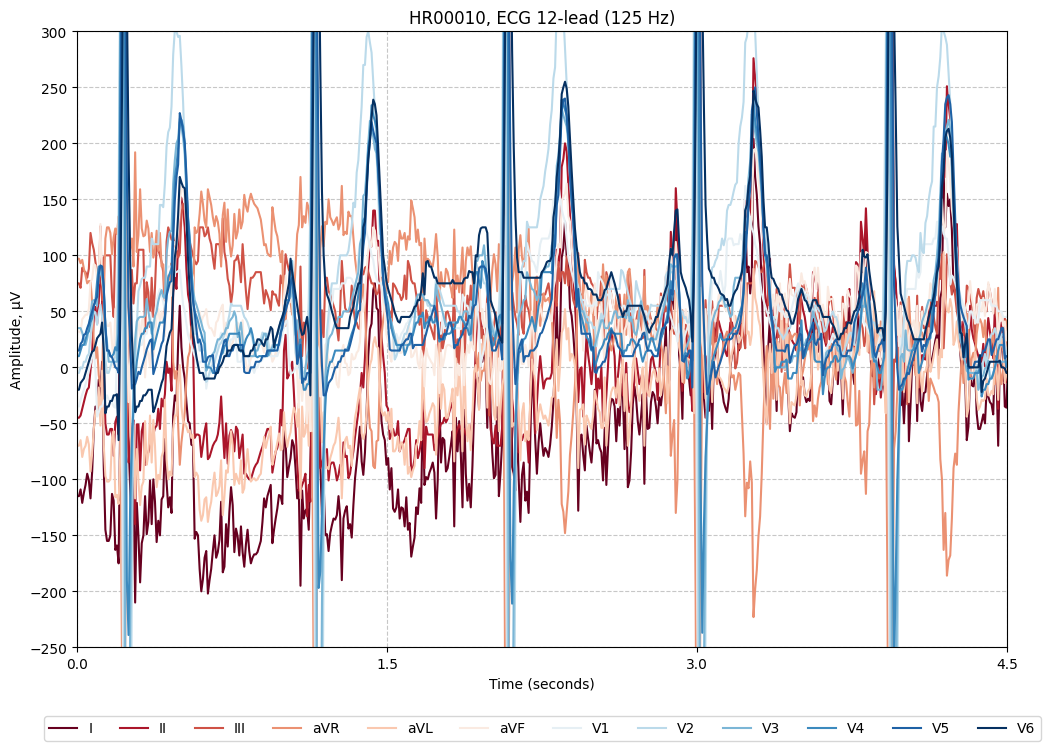

In [ ]:
# Save smaller plot files, 4.5 sec, 12 leads, HR00010.mat

fig = plt.figure(4, figsize=(12, 8))
ecg_labels = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
# Create a color map from red to blue
num_lines = len(ecg_labels)
colors = plt.cm.RdBu(np.linspace(0, 1, num_lines))


for i in range(12):
    plt.plot(time_downsampled, downsampled_data[i] + i * 5, color=colors[i], label=ecg_labels[i])

# Set x-axis limit to 4.5 seconds, y-axis limit to -250, 300.
plt.xlim(0, 4.5)
plt.ylim(-250, 300)

# Set x-axis ticks and grid every 1.5 seconds, y-axis ticks and grid
plt.xticks(ticks=[0, 1.5, 3.0, 4.5])
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid on x-axis every 1.5 sec
plt.yticks(range(-250, 301, 50))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude, \u03BCV")
plt.title("HR00010, ECG 12-lead (125 Hz)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=12)

# save image
plt.savefig("HR00010_ecg12_4.5sec.png", dpi=200, bbox_inches='tight')


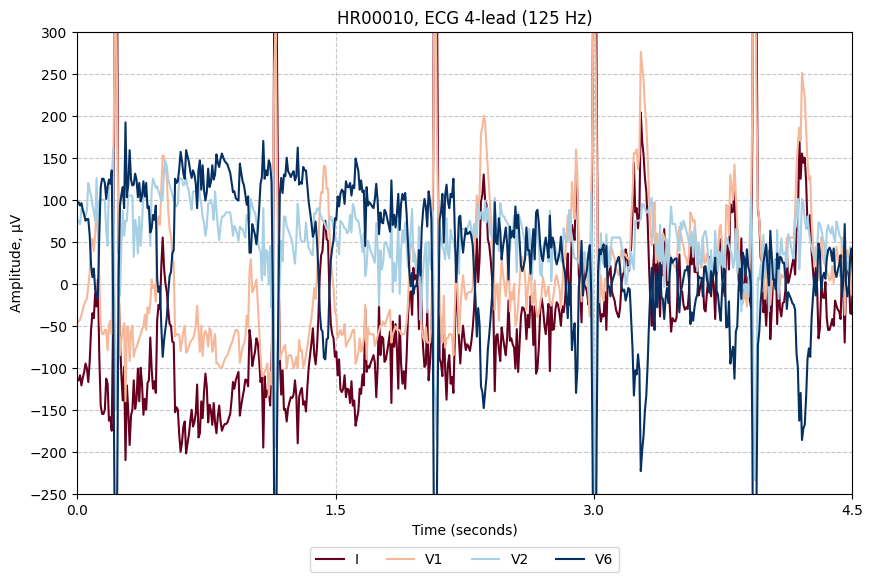

In [ ]:
# Save smaller plot 4 leads only, HR00010.mat

fig = plt.figure(5, figsize=(10, 6))
ecg_labels = ['I', 'V1', 'V2', 'V6'] # Tried limb I this time.
# Create a color map from red to blue
num_lines = len(ecg_labels)
colors = plt.cm.RdBu(np.linspace(0, 1, num_lines))

for i in range(4):
    plt.plot(time_downsampled, downsampled_data[i] + i * 5, color=colors[i], label=ecg_labels[i])

# Set x-axis limit to 4.5 seconds, y-axis limit to -250, 300.
plt.xlim(0, 4.5)
plt.ylim(-250, 300)

# Set x-axis ticks and grid every 1.5 seconds, y-axis ticks and grid
plt.xticks(ticks=[0, 1.5, 3.0, 4.5])
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid on x-axis every 1.5 sec
plt.yticks(range(-250, 301, 50))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude, \u03BCV")
plt.title("HR00010, ECG 4-lead (125 Hz)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=4)

# save image
plt.savefig("HR00010_ecg4_4.5sec.png", dpi=200, bbox_inches='tight')

In [2]:
# Time: 11:58 pm, stopped.
# Downloaded files, figures.

### JY Notes in figure  
Heart beat signals seem to widen (various leads) for a time, then contract for a time (few seconds.)  Same for both patients, HR00001 and HR00010.  Also need to double check definition of lead placement. Some V's move with aVR/aVL or I, II, III leads. Verify location of leads in PTB XL study, Germany.  